# Convert Your Shazam Playlist to YouTube Playlist

Listen to Your Shazam Discoveries for Free. Keywords:

Kabui, Charles  
2024-06-18

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/shazam-playlist-to-youtube-playlist/index.html) -- [Download as Notebook](https://toknow.ai/posts/shazam-playlist-to-youtube-playlist/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/shazam-playlist-to-youtube-playlist/index.pdf)
 *** 

<figure>
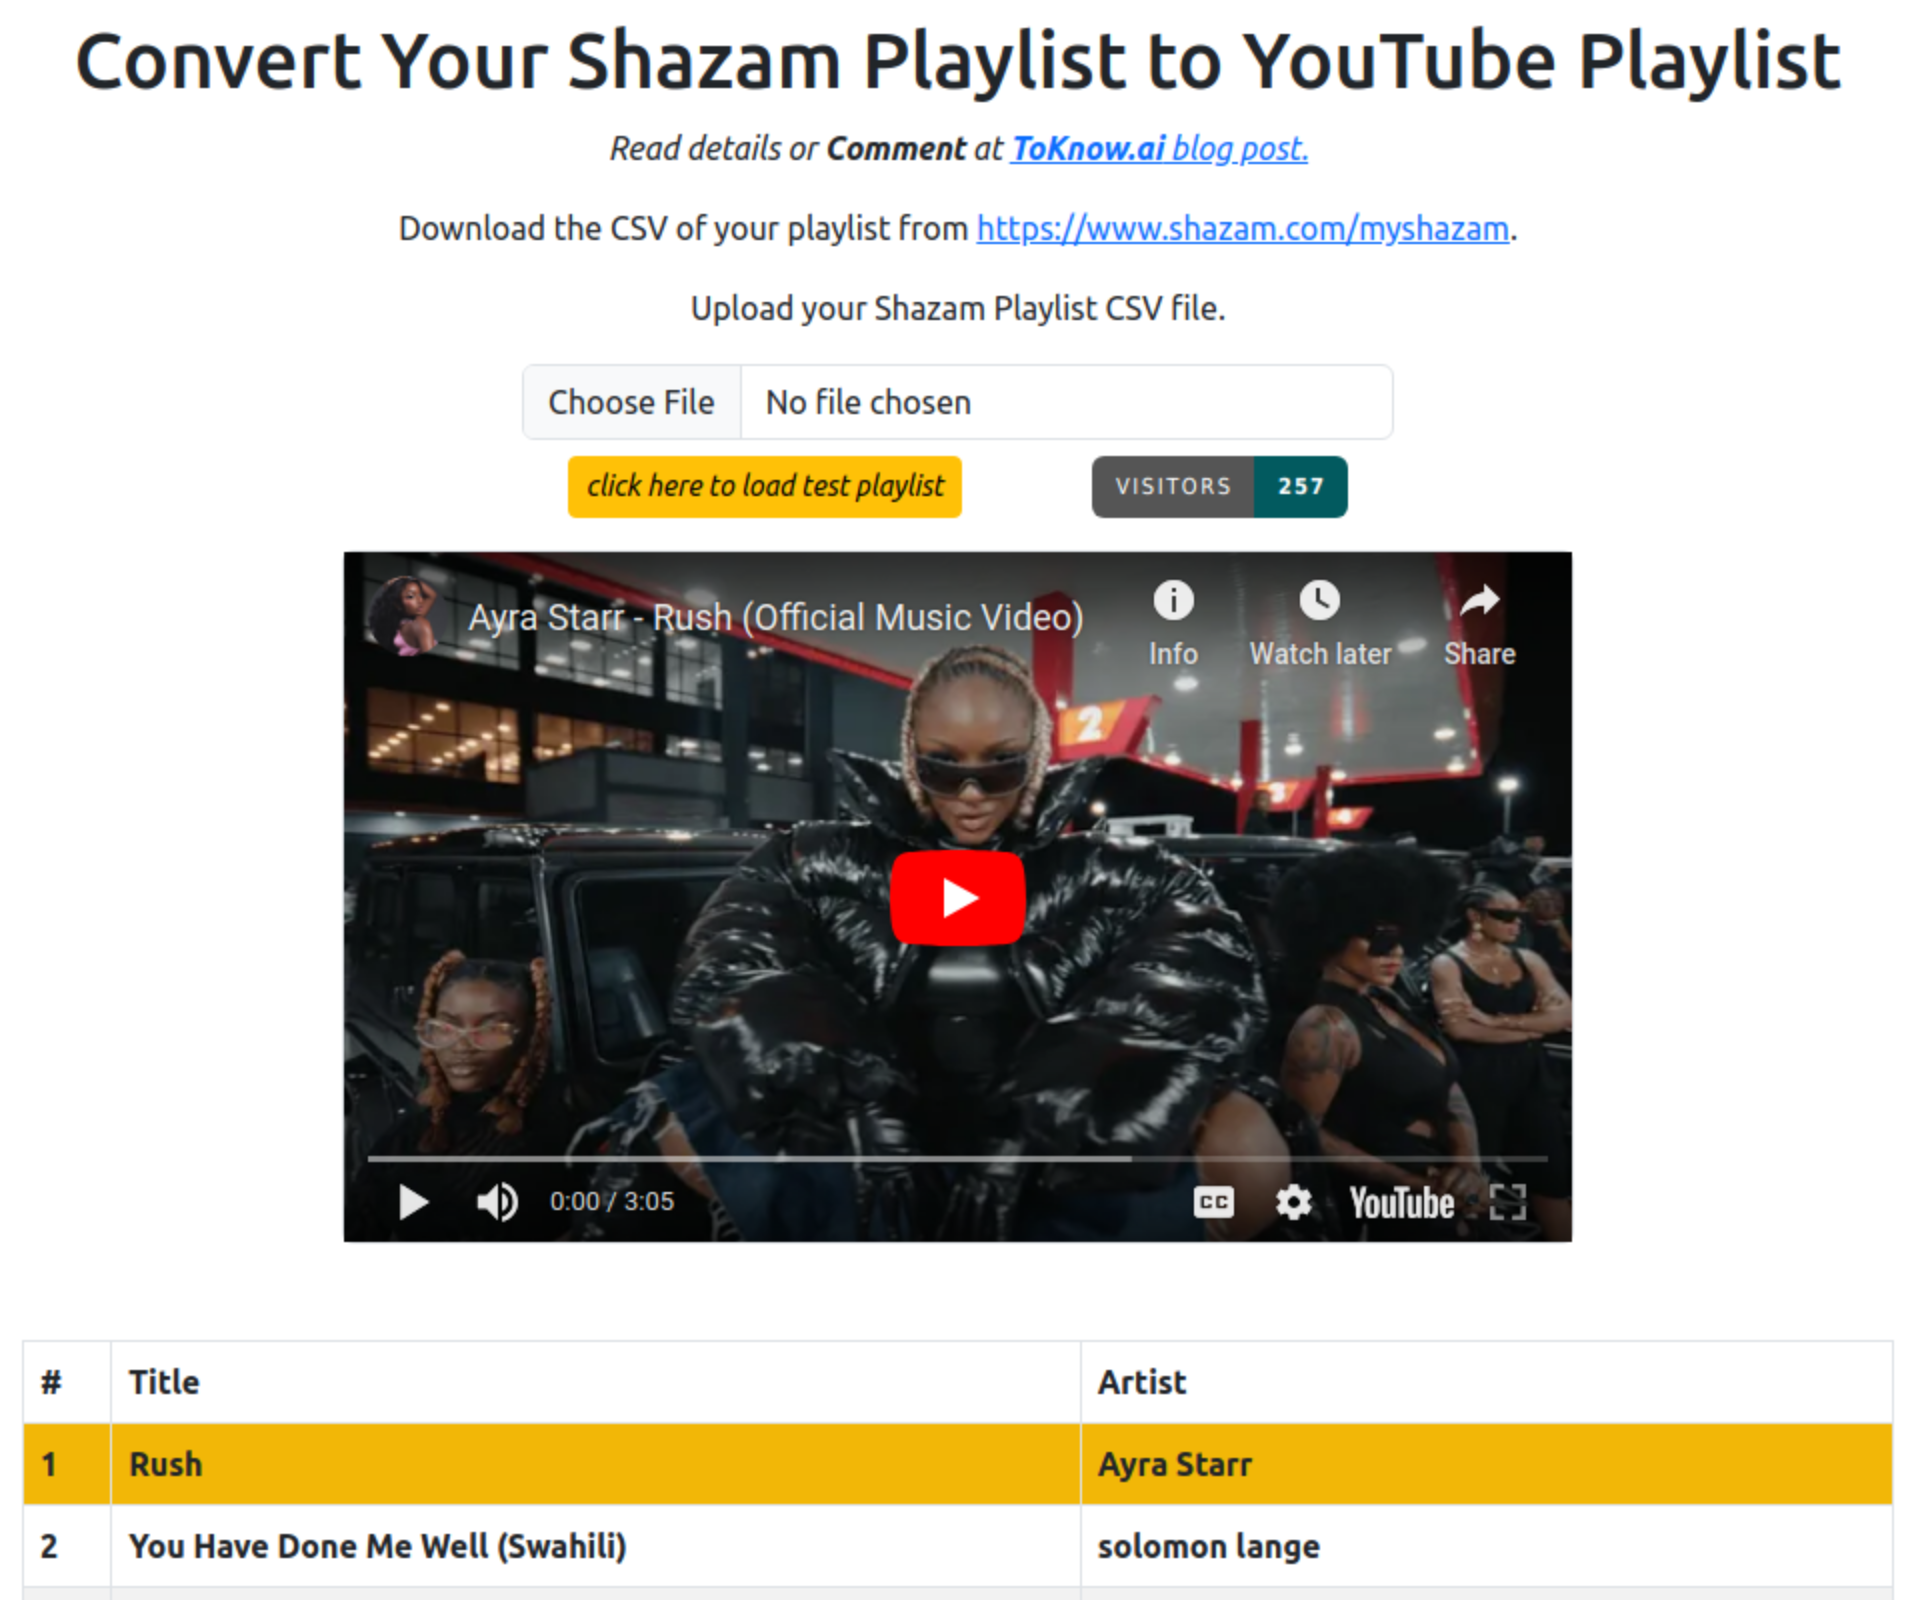
<figcaption aria-hidden="true">Test the app below this page</figcaption>
</figure>

## Introduction

Have you ever found yourself in a situation where you’ve Shazamed a
bunch of great songs, but can’t listen to them without subscribing to a
premium music service? Well, we’ve got great news for you! There’s a
free and easy way to enjoy your Shazam discoveries without breaking the
bank. Let’s dive into how you can convert your Shazam playlist to a
YouTube playlist and start listening right away.

## Enter the Shazam to YouTube Converter

We have developed a web application that takes your Shazam playlist and
converts it into a YouTube playlist. This means you can listen to full
versions of your discovered songs without paying for a subscription!

## How It Works

The process is surprisingly simple:

1.  **Export Your Shazam Library**: First, you’ll need to export your
    Shazam library as a CSV file. You can do this by visiting
    <https://www.shazam.com/myshazam> and downloading your list of
    identified songs.

2.  **Upload to the Converter**: Visit the [Shazam Playlist to YouTube
    Playlist
    converter](../../apps/shazam-playlist-to-youtube-playlist.qmd).
    Here, you’ll see an option to upload your CSV file.

3.  **Watch the Magic Happen**: Once you upload your file, the
    application processes your Shazam list and creates a YouTube
    playlist on the fly.

4.  **Start Listening**: A YouTube player will appear, ready to play
    through your entire list of songs. You can also see a table of all
    your tracks, allowing you to easily jump to any song in the list.

## Code

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("./shazam-playlist-to-youtube-playlist")

In [2]:
from IPython.display import HTML
import pandas as pd
from pytube import YouTube
from app import get_youtube_song

### Preview Data

In [3]:
# Load the Shazam library from a CSV file and return the DataFrame.
shazamlibrary_df = pd.read_csv('shazamlibrary.csv', header=1)
shazamlibrary_df

227 rows × 6 columns

### Format data

In [4]:
# Remove Duplicates and Select `Title` and `Artist`.
shazamlibrary_df = shazamlibrary_df.drop_duplicates(subset=['TrackKey'])[['Title', 'Artist']]
shazamlibrary_df

201 rows × 2 columns

In [5]:
# Test search
search_title, search_artist = shazamlibrary_df.loc[0].values
youtube: YouTube = get_youtube_song(search_title, search_artist)
youtube.watch_url

'https://youtube.com/watch?v=kPlSyYtE63M'

### Code to run the player

Below is the code used to run the server at Huggingface:

``` python
"""Shazam Playlist to Youtube Playlist"""

from pathlib import Path
import random
from typing import Optional
import logging
import pandas as pd
from pytube import Search, YouTube
from flask import Flask, request, send_from_directory
from sklearn.utils import shuffle as sklearn_shuffle

# https://github.com/pytube/pytube/issues/1270#issuecomment-2100372834
pytube_logger = logging.getLogger('pytube')
pytube_logger.setLevel(logging.ERROR)

app = Flask(__name__)

@app.route('/')
def index():
    """Route handler for the home page"""
    try:
        return send_from_directory('.', 'index.html')
    except Exception as e:
        return str(e)
    
@app.route('/video_id', methods=['POST'])
def video_id() -> str:
    """Route handler for retrieving the YouTube video ID"""
    try:
        title: str = request.json.get('title')
        artist: str = request.json.get('artist')
        youtube: YouTube = get_youtube_song(title, artist)
        return youtube.video_id
    except Exception as e:
        return str(e)

@app.route('/parse_csv', methods=['POST'])
def parse_csv():
    """Route handler for parsing the uploaded CSV file"""
    try:
        file = request.files['file']
        # Process the uploaded file
        return parse_csv_util(pd.read_csv(file, header=1))
    except Exception as e:
        return str(e)

@app.route('/parse_csv_test', methods=['GET'])
def parse_csv_test():
    """Route handler for parsing the test CSV file"""
    try:
        # Construct the path to the CSV file
        csv_path = Path(__file__).parent / 'shazamlibrary.test.csv'
        return parse_csv_util(pd.read_csv(csv_path, header=1), True)
    except Exception as e:
        return str(e)

def get_youtube_song(title: str, artist: str) -> Optional[YouTube]:
    """Searches for a YouTube video based on the given title and artist"""
    search_result = Search(f'{title} by {artist}')
    return search_result.results[0] if search_result.results else None

def parse_csv_util(df: pd.DataFrame, shuffle = False):
    try:
        df = df.drop_duplicates(subset=['TrackKey'])[['Title', 'Artist']]
        if shuffle:
            for random_state in random.sample(range(444, 44444), 3):
                df = sklearn_shuffle(df, random_state=random_state).reset_index(drop=True)
        return df.to_json(orient="records")
    except Exception as e:
        return str(e)
```

Below is the HTML page that renders the page:

``` html
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ToKnow.ai - Shazam Playlist to Youtube Playlist</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/css/bootstrap.min.css" rel="stylesheet">
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://www.youtube.com/iframe_api"></script>
    <style>
        .youtube-player,
        iframe {
            width: 100%;
            height: 100%;
        }

        .playlist tbody tr {
            cursor: pointer;
        }
    </style>
</head>

<body class="bg-light">
    <div class="container my-4">
        <h1 class="text-center">Convert Your Shazam Playlist to YouTube Playlist</h1>
        <p class="text-center">
            <em>
                <i>
                    Read details or <b>Comment</b> at
                    <a target="_blank"
                        href="https://toknow.ai/posts/shazam-playlist-to-youtube-playlist/"><b>ToKnow.ai</b> blog
                        post.
                    </a>
                </i>
            </em>
        </p>
        <p class="text-center">
            Download the CSV of your playlist from
            <a href="https://www.shazam.com/myshazam" target="_blank">https://www.shazam.com/myshazam</a>.
        </p>
        <p class="text-center">Upload your Shazam Playlist CSV file.</p>
        <div class="row mx-2 justify-content-center">
            <div class="col-md-6">
                <input type="file" class="form-control upload-form col-md-6" accept=".csv">
            </div>
        </div>

        <div class="row mt-2 justify-content-center">
            <div class="col-md-6 d-flex justify-content-around flex-wrap">
                <a id="load-test-playlist" class="btn btn-warning btn-sm fst-italic">
                    click here to load test playlist
                </a>

                <img class="rounded"
                    src="https://api.visitorbadge.io/api/visitors?path=https://toknow.ai/posts/shazam-playlist-to-youtube-playlist" />
            </div>
            
        </div>

        <div class="row mt-3 justify-content-center">
            <div class="col-md-8">
                <div class="object-fit-contain border rounded ratio ratio-16x9">
                    <div class="youtube-player"></div>
                </div>
            </div>
        </div>

        <div class="row mt-5">
            <div class="col-md-12 playlist table-responsive">
            </div>
        </div>
    </div>

    <script>
        const playlistTable = document.querySelector('.playlist');
        const uploaForm = document.querySelector('.upload-form');
        let songsPlaylist = []
        let videoIndex = -1;
        let youtubePlayer;

        document.querySelector('#load-test-playlist').addEventListener('click', async e => {
            try {
                e.preventDefault();

                const playlist = await(await fetch('/parse_csv_test')).json();
                generateTable(playlist)
            } catch (error) {
                playlistTable.innerHTML = error;
            }
        });

        uploaForm.addEventListener('input', e => {
            e.preventDefault();
            if (e.target.files.length == 0) {
                return;
            }

            parseCsv(e.target.files[0], playlistTable);
        });
        playlistTable.addEventListener('click', e => {
            e.preventDefault();
            const row = event.target.closest('tr');
            if (row) {
                const index = row.dataset.index ? Number(row.dataset.index) : undefined;
                onContinue(undefined, index);
            }
        });
        function resetCurrentPlayingBackground() {
            playlistTable.querySelectorAll('tbody tr').forEach(row => {
                if (Number(row.dataset.index) == videoIndex) {
                    row.classList.add('bg-warning');
                } else {
                    row.classList.remove('bg-warning');
                }
            })
        }
        function addErrorToCurrentIndex() {
            playlistTable.querySelectorAll('tbody tr').forEach(row => {
                if (Number(row.dataset.index) == videoIndex) {
                    row.classList.add('bg-danger');
                }
            })
        }
        async function getVideoId(song) {
            const response = await fetch(
                '/video_id',
                {
                    headers: { 'Content-Type': 'application/json' },
                    method: 'POST',
                    body: JSON.stringify({ title: song.Title, artist: song.Artist })
                });
            return await response.text()
        }
        async function nextVideo(callback, newIndex = undefined) {
            newIndex = newIndex >= 0 ? newIndex : (videoIndex + 1)
            videoIndex = newIndex < songsPlaylist.length ? newIndex : 0;
            let video_id = await getVideoId(songsPlaylist[videoIndex]);
            callback(video_id);
            resetCurrentPlayingBackground();
        }
        function generateTable(playlist) {
            try {
                songsPlaylist = playlist
                const tableBody = songsPlaylist.map((i, index) => `
                            <tr data-index="${index}">
                                <th>${index + 1}</th>
                                <th>${i.Title}</th>
                                <th>${i.Artist}</th>
                            </tr>`
                ).join('')
                playlistTable.innerHTML = `
                <table class="table table-striped table-hover table-bordered rounded">
                    <thead>
                        <tr>
                            <th>#</th>
                            <th>Title</th>
                            <th>Artist</th>
                        </tr>
                    </thead>
                    <tbody>${tableBody}</tbody>
                </table>`

                tryToPlay(() => {
                    videoIndex = -1;
                    onContinue();
                }, 100)
            } catch (error) {
                playlistTable.innerHTML = error;
            }
        }
        async function parseCsv(file, playlistTable) {
            try {
                const formData = new FormData();
                formData.append('file', file);
                const playlist = await (await fetch('/parse_csv', { method: 'POST', body: formData })).json();
                generateTable(playlist)
            } catch (error) {
                playlistTable.innerHTML = error;
            }
        }
        function initiatePlayer() {
            const youtubePlayerElement = document.querySelector('.youtube-player');
            youtubePlayer = window.youtubePlayer = new YT.Player(youtubePlayerElement, {
                height: '100%',
                width: '100%',
                playerVars: { autoplay: 1 },
                events: {
                    'onReady': function (event) {
                        event.target.playVideo()
                    },
                    'onStateChange': function (event) {
                        if (event.data === YT.PlayerState.ENDED) {
                            onContinue(event?.target);
                        }
                    },
                    'onError': function (event) {
                        addErrorToCurrentIndex();
                        onContinue(event?.target);
                    }
                }
            });
        }
        function onContinue(player = undefined, newIndex = undefined) {
            if (songsPlaylist.length > 0) {
                nextVideo((value) => {
                    player = player || youtubePlayer
                    player.loadVideoById(value);
                    setTimeout(() => {
                        player.playVideo();

                        setTimeout(() => {
                            if (player.getPlayerState() != YT.PlayerState.PLAYING) {
                                player.playVideo();
                            }
                        }, 10);
                    }, 10);
                }, newIndex);
            }
        }

        function tryToPlay(playCallback, timeout) {
            setTimeout(() => {
                if (YT.Player) {
                    if (!youtubePlayer) {
                        initiatePlayer();
                        tryToPlay?.();
                    } else if (songsPlaylist.length > 0) {
                        playCallback();
                    }
                }
            }, timeout);
        }

        tryToPlay(null, 300);
    </script>
</body>

</html>
```

## Test the App

> [/apps/shazam-playlist-to-youtube-playlist](../../apps/shazam-playlist-to-youtube-playlist.qmd)

<iframe  width="100%" height="700px" src="https://toknow-ai-shazam-playlist-to-youtube-playlist.hf.space" frameborder="0"></iframe>

## Conclusion

The Shazam to YouTube Playlist converter offers a fantastic, free
alternative for enjoying your music discoveries. It bridges the gap
between Shazam’s identification capabilities and the vast library of
music available on YouTube. Whether you’re a casual music listener or an
avid discoverer of new tunes, this tool provides a valuable service
without the need for paid subscriptions. Give it a try and turn your
Shazam discoveries into a personalized YouTube concert. Happy listening!

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* *While this tool is free and convenient, always respect
copyright laws and support your favorite artists when possible.* ***Read
more: [/terms-of-service](https://toknow.ai/terms-of-service)***